# Jupyter notebook template

This is a template file to start from.

 - First, import some stuff

In [1]:
#Annoying folder stuff
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import plotting and numpy
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Import vortex panel and boundary layer functions
from vortexpanel import VortexPanel as vp
from vortexpanel import BoundaryLayer as bl

 - Then you can do whatever you want by typing, coding, or adding equations
 
$$ E = mc^2 $$

In [2]:
# This is a code cell
print([i**2 for i in range(10)])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Use help() to gain info on the functions

In [3]:
help(vp.panelize)

Help on function panelize in module vortexpanel.VortexPanel:

panelize(x, y)
    Create a PanelArray from a set of points
    
    Inputs:
    x,y    -- the x and y location of the panel end points
    
    Outputs:
    A PanelArray object
    
    Note:
    The first and last point should match for a
    closed shape.



Example on how to use vp.panelize()

(-0.05, 1.05, -0.05, 1.05)

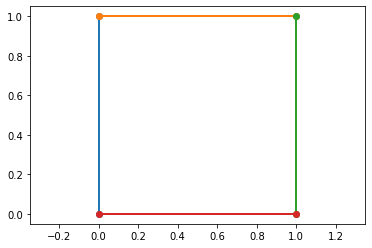

In [4]:
x = [0,0,1,1,0]
y = [0,1,1,0,0]
square = vp.panelize(x,y)
square.plot(style='o-')
plt.axis('equal')

In [5]:
help(vp.PanelArray.plot)


Help on function plot in module vortexpanel.VortexPanel:

plot(self, style='k', nlabel=0)
    Plot the PanelArray panels
    
    Inputs:
    style -- a string defining the matplotlib style
    nlabel -- add every 'nlabel' panel index labels
    
    Example:
    circle = vp.make_circle(N=32) # make a circle PanelArray
    circle.plot(style='o-')       # plot the geometry



## Personal Attempt on making a circle

In [6]:
def make_circle(radius, n):
    wedge_angle = 2*np.pi/(n)
    x = []
    y = []
    for i in range(n):
        x.append(radius*np.sin(i*wedge_angle))
        y.append(radius*np.cos(i*wedge_angle))
    x.append(x[0])
    y.append(y[0])
    return vp.panelize(x,y)

    

(-1.1, 1.1, -1.1, 1.1)

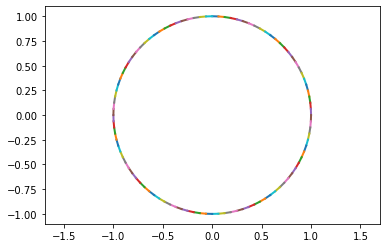

In [7]:
circle = make_circle(radius=1, n=100)
circle.plot(style = '-')
plt.axis('equal')

## Gabe's solution to making a circle

(-1.1, 1.1, -1.1, 1.1)

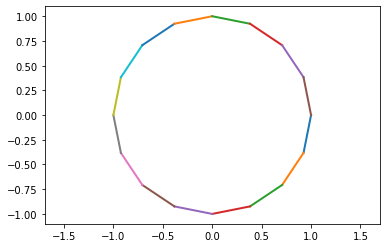

In [8]:
def make_circle(N, radius=1):
    theta=np.linspace(2*np.pi,0,N+1)
    x = radius*np.cos(theta)
    y = radius*np.sin(theta)
    return vp.panelize(x,y)

circle=make_circle(N=16)
circle.plot(style='-')
plt.axis('equal')

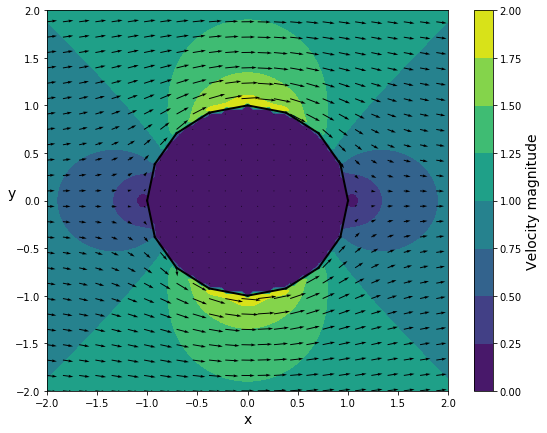

In [9]:
circle.solve_gamma()
circle.plot_flow()

# **QUANTATIVE TESTING**

get_array will return any of the data in the shape. 
distance is the summation of 'S' over the whole shape

In [10]:
circle.get_array('gamma')
circle.get_array('S')
circle.distance();

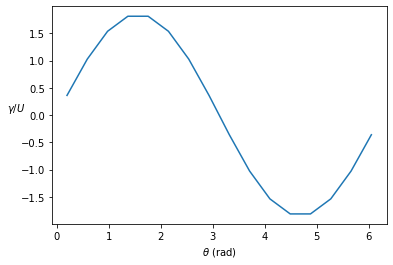

In [11]:
gamma=circle.get_array('gamma')
s = circle.distance()
plt.plot(s,gamma)
plt.xlabel(r'$\theta$ (rad)');plt.ylabel(r'$\gamma/U$', rotation=0);

Validation means that the numbers are correct. Comparing the result to a *known solution*. Potential flow around a circle has an analytical solution (from class).

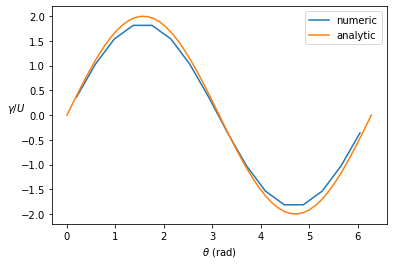

In [12]:
gamma=circle.get_array('gamma')
s = circle.distance()
plt.plot(s,gamma,label='numeric')
theta=np.linspace(0,2*np.pi)
plt.plot(theta,2*np.sin(theta),label='analytic')
plt.xlabel(r'$\theta$ (rad)');plt.ylabel(r'$\gamma/U$', rotation=0);plt.legend();

Note that the peak doesn't match, and gets worse as the 'resolution' of the numerical circle decreases. 
**Convergance**
A numerical method should converge to a known solution with increasing resolution.

# **Group coding activity**

1) Write a function to get the maximum numericalerror on the circle for a given number of panels $N$

2) plot how error depends on $N$

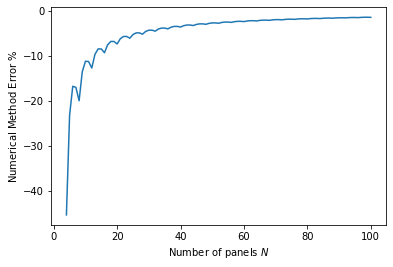

In [13]:
def max_error(N):
    circle=make_circle(N)
    circle.solve_gamma()
    gamma=circle.get_array('gamma')
    return ((max(gamma) - 2)*100)/2

N = range(4,101)
error = [max_error(N) for N in N]
plt.plot(N, error)
plt.xlabel(r'Number of panels $N$'),plt.ylabel(r'Numerical Method Error $\%$');

## **Gabes Solution**

In [14]:
def circle_error(N):
    circle = make_circle(N)
    circle.solve_gamma()
    return 2-max(circle.get_array('gamma'))
    # return max(abs(2*np.sin(circle.sitance())-circle.get_array('gamma')))

Can't pass lists into circle_error(N) as make_circle doesn't know what to do with loops. Use *decorators* instead

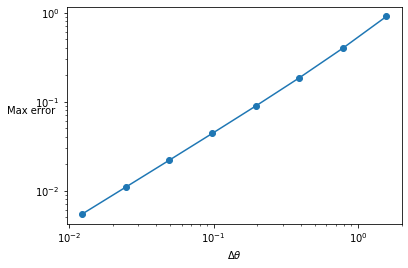

In [15]:
@np.vectorize
def circle_error(N):
    circle = make_circle(N)
    circle.solve_gamma()
    gamma = circle.get_array('gamma')
    return 2-max(gamma)

N = 2**np.arange(2,10)
plt.loglog(2*np.pi/N, circle_error(N), 'o-')
plt.xlabel(r'$\Delta\theta$'); plt.ylabel('Max error',rotation=0);

use plt.loglog to get logarithmic axis. 
Don't plot as percentage. Not using a percentage gets an error that scales by U=1

# Numerical Methodlogy

* 1) Pre-processing
* 2) Simulate
* 3) Post-processing

### Pre-processing

Writing the problem in a way that can be solved by the program (writing a mesh, setting up the CFD simulation etc)

### Simulate

Carry out a descrete arithmeti method to approximate the solution: finding the roots of a function, integrating an ODE, etc etc

### Post-processing

Convert the computer output back into engineering terms. Plot the flow aorund the circle, check the surface velocity etc

## Lifting Bodies

This section will modify the vortex Panel to enable the prediction of lifting Bodies

### Foil Section Geometry

The first step is to deine a foil-like section by applying the Jukowski mapping to a circle

In [16]:
help(vp.make_jfoil)

Help on function make_jfoil in module vortexpanel.VortexPanel:

make_jfoil(N, xcen=-0.1, ycen=0)
    Make a foil-shaped PanelArray using the Jukowski mapping
    
    Note:
    A circle passing through point (1,0) is mapped to create the sharp foil
    
    Inputs:
    N         -- number of panels to use
    xcen,ycen -- center of the circle before mapping
    
    Outputs:
    A PanelArray object; see help(PanelArray)
    
    Example:
    foil = vp.make_jfoil(N=34)  # make
    foil.plot()                 # plot



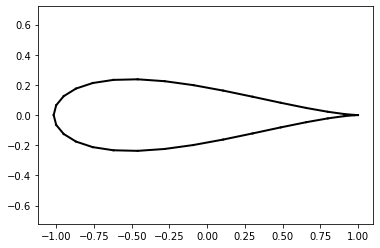

In [17]:
vp.make_jfoil(32).plot()
plt.axis('equal');

### ```ycen```
Shift the center up or down

### ```xcen```
Changes the foil thickness

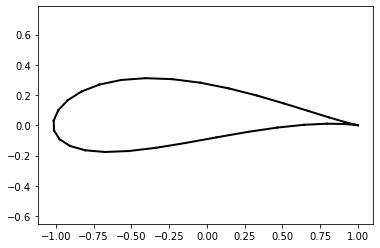

In [18]:
vp.make_jfoil(32, ycen=0.05).plot()
plt.axis('equal');

## Flows with Ciculation

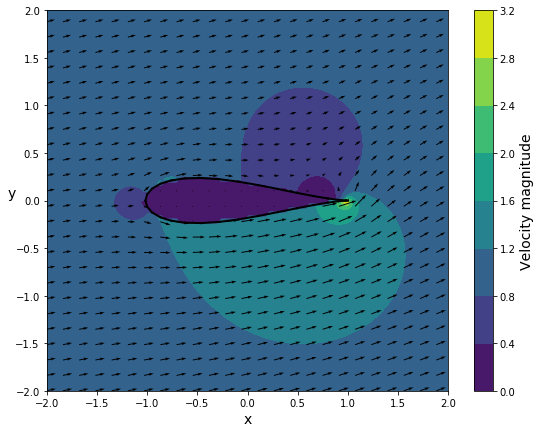

In [19]:
foil = vp.make_jfoil(32)
alpha = np.pi/10
foil.solve_gamma(alpha)
foil.plot_flow()

*alpha*, angle of attack, can be passed into solve_gamma

## This is wrong!!!

There's a singularity on the foil underside
The flow on the bottom is faster than the flow on the top

### The Kutta condition hasn't been applied

The sharp corner creates an infinite pressure. The kutta condition forces the 'real-world' solution, even though the above solution is technically a valid potential flow
 * Uniquely determines solution
 * Links the solution to the angle of attack
 * It is an optional argument to ```solve_gamma```

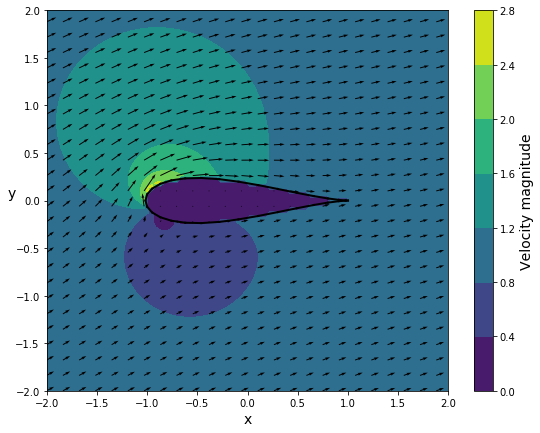

In [20]:
foil = vp.make_jfoil(32)
alpha = np.pi/8
foil.solve_gamma(alpha,kutta=[(0,-1)])
# Since the 0th and 31st panel (the last one in the list) are the ones by the trailing edge
foil.plot_flow()

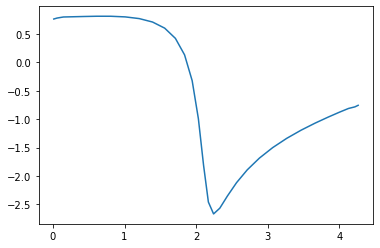

In [21]:
foil = vp.make_jfoil(32)
alpha = np.pi/8
foil.solve_gamma(alpha,kutta=[(0,-1)])
plt.plot(foil.distance(),foil.get_array('gamma'));

# Get the Lift Force on the foil

$L = -\rho U \Gamma = -\rho U^2 (\Gamma$^~$)$

### Quiz - What is the expression for the lift coefficient in terms of `gamma` and the panel half-width `S`?

`-sum(gamma*2*S)/(0.5*c)`

## Validate the lift - Group Task

1. Write a function to determine $C_L$ given a foil anad an angle of attack. Make sure to enforce the Kutta condition

2. Plot the $C_L$ vs $\alpha$ and compare against the analystic solution

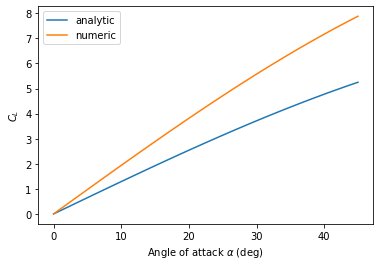

In [22]:
@np.vectorize
def analytic_C_L(alpha):
    t_c=0.2357 # t_c is the foil thickness/cord
    return 2*np.pi*(1+4/(3*np.sqrt(3))*t_c)*np.sin(alpha)

@np.vectorize
def numeric_C_L(alpha,panels, c=1):
    foil = vp.make_jfoil(panels)
    foil.solve_gamma(alpha,kutta=[(0,-1)])
    gamma = foil.get_array('gamma')
    S = foil.get_array('S')
    
    return -sum(gamma*2*S)/(0.5*c)

alpha= np.linspace(0, 45*np.pi/180)
panels = 32
plt.plot(alpha*180/np.pi, analytic_C_L(alpha), label='analytic')
plt.plot(alpha*180/np.pi, numeric_C_L(alpha, panels=panels), label='numeric')
plt.xlabel(r'Angle of attack $\alpha$ (deg)'); plt.ylabel('$C_L$');plt.legend();

### Gabe's Solution

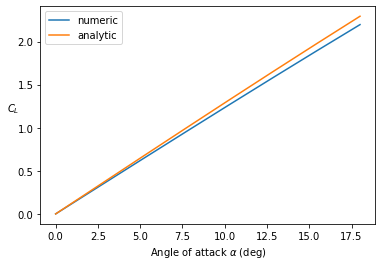

In [23]:
@np.vectorize
def analytic_C_L(alpha):
    t_c=0.2357 # t_c is the foil thickness/cord
    return 2*np.pi*(1+4/(3*np.sqrt(3))*t_c)*np.sin(alpha)

@np.vectorize
def numeric_C_L(alpha,panels, c=1):
    panels.solve_gamma(alpha, kutta=[(0,-1)])
    gamma,S,xc = panels.get_array('gamma', 'S','xc')
    c = max(xc) - min(xc)
    return -sum(gamma*2*S)/(0.5*c)

foil = vp.make_jfoil(512)
alpha = np.linspace(0, np.pi/10, 8)

plt.plot(np.degrees(alpha), numeric_C_L(alpha, foil), label='numeric')
plt.plot(np.degrees(alpha), analytic_C_L(alpha), label='analytic')
plt.xlabel(r'Angle of attack $\alpha$ (deg)'); plt.ylabel('$C_L$', rotation=0);plt.legend();

# Linear Panels

Panels with * linearly varying* strength instead of a constant strength

### It's not that hard to change the code to make the strength to vary linearly across the panels, so that the strength is continuous across the panels

*It's MUCHHH better than constant strength panels*

Utilise `panels.solve_gamma_O2` instead of `panels.solve_gamma`

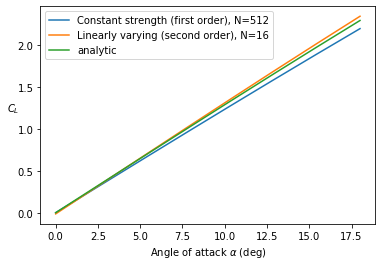

In [24]:
@np.vectorize
def analytic_C_L(alpha):
    t_c=0.2357 # t_c is the foil thickness/cord
    return 2*np.pi*(1+4/(3*np.sqrt(3))*t_c)*np.sin(alpha)

@np.vectorize
def numeric_C_L(alpha,panels, c=1):
    panels.solve_gamma(alpha, kutta=[(0,-1)])
    gamma,S,xc = panels.get_array('gamma', 'S','xc')
    c = max(xc) - min(xc)
    return -sum(gamma*2*S)/(0.5*c)

@np.vectorize
def numericO2_C_L(alpha,panels, c=1):
    panels.solve_gamma_O2(alpha, kutta=[(0,-1)])
    gamma,S,xc = panels.get_array('gamma', 'S','xc')
    c = max(xc) - min(xc)
    return -sum(gamma*2*S)/(0.5*c)

foil1 = vp.make_jfoil(512)
foil2 = vp.make_jfoil(16)
alpha = np.linspace(0, np.pi/10, 8)

plt.plot(np.degrees(alpha), numeric_C_L(alpha, foil1), label='Constant strength (first order), N=512')
plt.plot(np.degrees(alpha), numericO2_C_L(alpha, foil2), label='Linearly varying (second order), N=16')
plt.plot(np.degrees(alpha), analytic_C_L(alpha), label='analytic')
plt.xlabel(r'Angle of attack $\alpha$ (deg)'); plt.ylabel('$C_L$', rotation=0);plt.legend();

Even with many more panels, linearly varying strength beats constant strength. Second order (linearly varying) methods are much better than first order

# Week 9

# Separation Prediction
## Thwaites Integral Method
$ \frac{\delta_2}{L} (Re_L)^2 = ( \frac{0.45}{u_s^6(s)}  \int_0^s{u_s^5(s)ds})^{0.5} $

### Quiz - How long will the boundary layer equation take compared to the vortex panel equation?
 * Potential flow requires solving a matrix $A \gamma = b$ which takes $O(N^3)$ operations
 * Integrating (adding) $N$ items requires only $O(N)$ operations

So boundary layer step is muchhhh faster than the potential flow solution and therefore won't add any noticable amount of computational time

Lets *validate* the code (`bl.thwaites`) against Blausius solution:
$ \delta_2 \sqrt{U/\nu L} = 0.664 \sqrt{x/L} $


In [25]:
help(bl.thwaites)

Help on function thwaites in module vortexpanel.BoundaryLayer:

thwaites(s, u_s)
    Integrate Thwaites over the boundary layer and find shape factor
    
    Notes:
    Output array values after separation(lam<-12) are meaningless.
    
    Inputs:
    s   -- array of distances along the boundary layer; must be positive and increasing
    u_s -- array of external velocities; must be positive
    
    Outputs:
    delta2 -- momentum thickness array
    lam    -- shape factor array
    iSep   -- distance along array to separation point (iSep=len(s) means no separation)
    
    Example:
    s = np.linspace(0,np.pi,32)          # distance along BL
    u_s = 2*np.sin(s)                    # circle external velocity
    delta2,lam,iSep = bl.thwaites(s,u_s) # BL properties



Remember the criteria for separation is that $\lambda = 12 $

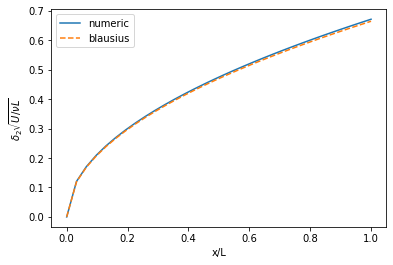

In [34]:
s = np.linspace(0,1,32)             # distance along BL
u_s = np.ones_like(s)               # external velocity
delta2, lam, iSep = bl.thwaites(s, u_s)   # BL properties

plt.plot(s, delta2, label='numeric')
plt.plot(s, 0.664*np.sqrt(s), label='blausius', ls='--')
plt.xlabel('x/L'); plt.ylabel(r'$\delta_2 \sqrt{U/\nu L}$'); plt.legend();

All we need is to know s and u_s to apply this to any shape.

Note that on the foil, we have 2 boundary layers: one on the top, and one on the bottom

### Quiz - Where is the starting point of the two boundary layers?

* At the stagnation point

There's actually two stagnation points (at the leading edge and trailing edge). We only want the one at the leading edge.

We can do this using `vp.PanelArray.split`

In [35]:
help(vp.PanelArray.split)

Help on function split in module vortexpanel.VortexPanel:

split(self)
    Split PanelArray into two boundary layer sections
    
    Outputs:
    top     -- PanelArray defining the top BL
    bottom  -- PanelArray defining the bottom BL
    
    Example:
    foil = vp.make_jfoil(N=64)        #1. Define the geometry
    foil.solve_gamma_kutta(alpha=0.1) #2. Solve for the potential flow
    foil_top,foil_bot = foil.split()  #3. Split the boundary layers



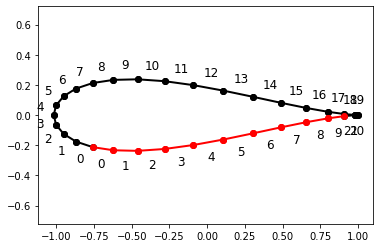

In [39]:
foil = vp.make_jfoil(N=32)                  # Pre-processing
foil.solve_gamma_O2(alpha = 0.2, kutta=[(0,1)])     # Solve
foil_top, foil_bot = foil.split()           # Split the boundary layers
foil_top.plot('-ok',1)
foil_bot.plot('-or',1)
plt.axis('equal');

### Why does Gabe keep tasting code on simple shapes like circles?

* To validate the code

Every piece of code needs to be tested agaisnt a known nontrivial example

## Coding excersize

* 1) Run `solve_gamma_O2` to get circle flow
* 2) Run `bl.thwaites` to determine `del2, lambda,iSep` for a circle flow
* 3) Plot `lambda` aginst $\theta = s/R$ and compare this to the *theoretical* separation point $0.88 rad$


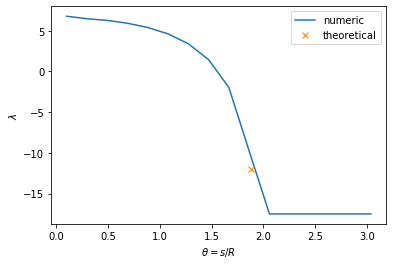

In [62]:
circle = vp.make_circle(N=32)
circle.solve_gamma_O2()
circle_top, circle_bot = circle.split()
del2, lam, iSep = bl.thwaites(circle_top.distance(), u_s=-circle_top.get_array('gamma'))
plt.plot(circle_top.distance(), lam, label='numeric')
plt.plot(1.88, -12, 'x', label='theoretical')
plt.xlabel(r'$\theta = s/R$'); plt.ylabel(r'$\lambda$'); plt.legend();

# Gabe's Solution

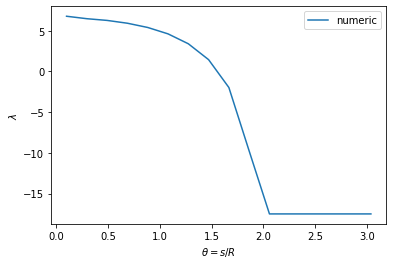

In [70]:
circle=vp.make_circle(N=32) # pre-process
circle.solve_gamma_O2()     # solve
top,_ = circle.split()      # link

s,u_s = top.distance(), -top.get_array('gamma')      # pre-process

delta2, lam, iSep = bl.thwaites(s,u_s)              #BL properties
plt.plot(s, lam, label='numeric')
plt.xlabel(r'$\theta = s/R$'); plt.ylabel(r'$\lambda$'); plt.legend();

Can also be run like :

analytic prediction @ s=1.88 
numeric prediction @ s=1.878


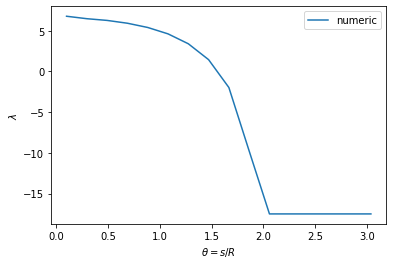

In [75]:
circle=vp.make_circle(N=32) # pre-process
circle.solve_gamma_O2()     # solve
top,_ = circle.split()      # link

delta2, lam, iSep = top.thwaites()              #BL properties WRAPPER
plt.plot(top.distance(), lam, label='numeric')
plt.xlabel(r'$\theta = s/R$'); plt.ylabel(r'$\lambda$'); plt.legend();

sep_dis = bl.sep(top.distance(), iSep)      # post-processing
print('analytic prediction @ s=1.88 \nnumeric prediction @ s={:.3f}'.format(sep_dis))